In [39]:
import numpy as np
from IPython.display import Latex as lt
import random

import math
from math import pi

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity

from qiskit.extensions import RXGate, XGate, CXGate

# Creating "function PastaQ.gate"
Single Matrix 

\begin{bmatrix}
\cos{\theta/2} & (-i \exp^{-i \phi} \sin(\theta/2))\\
 (-i \exp^{i \phi} \sin(\theta/2)) & \cos(\theta/2)
\end{bmatrix}

Double Matrix

\begin{bmatrix}
        \cos(\Theta) &   0 &   0 &   -i \sin(\Theta)\\
        0    &\cos(\Theta)   & -i \sin(\Theta)    &0\\
        0    &-i \sin(\Theta)  &  \cos(\Theta)    &0\\
        -i \sin(\Theta) &   0  &  0   & \cos(\Theta)\\
\end{bmatrix}

In [53]:
def gateSingle(theta,phi):
    j=complex(0,1);
    return Operator(np.matrix([[np.cos(theta/2),(-j*np.exp(-j*phi)*np.sin(theta/2))],[(-j*np.exp(j*phi)*np.sin(theta/2)),np.cos(theta/2)]]))
def gateDouble(Theta):
    j=complex(0,1);
    return Operator(np.matrix([[np.cos(Theta),0,0,(-j * np.sin(Theta))],[0,np.cos(Theta),(-j * np.sin(Theta)),0],[0,(-j * np.sin(Theta)),np.cos(Theta),0],[(-j * np.sin(Theta)),0,0,np.cos(Theta)]]))

In [54]:
#Example Testing
r1=pi*random.random()
gateSingle(r1,r1)
gateDouble(r1)

Operator([[0.39319914+0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        -0.91945334j],
          [0.        +0.j        , 0.39319914+0.j        ,
           0.        -0.91945334j, 0.        +0.j        ],
          [0.        +0.j        , 0.        -0.91945334j,
           0.39319914+0.j        , 0.        +0.j        ],
          [0.        -0.91945334j, 0.        +0.j        ,
           0.        +0.j        , 0.39319914+0.j        ]],
         input_dims=(2, 2), output_dims=(2, 2))

In [143]:
def run(N,depth):
    #N is number of Qubit
    #depth is the iteration of single and double Qubit
    
    #Create base circuits
    qr = QuantumRegister(N, 'q')
    cr = ClassicalRegister(N, 'c')
    circ = QuantumCircuit(qr,cr)
    

    
    for i in range(depth):
    #Apply single-qubit random rotation for all the qubit
        for j in range(N):
            circ.append(gateSingle(2*pi*random.random(),2*pi*random.random()), [j])

        #Julia started with index 1, so I need to change it by i+1, then I change back on Range    
        idx_first = (i+1) % 2 + 1

        for j in range(idx_first-1,N-1,2):
            circ.append(gateDouble(2*pi*random.random()), [j,j+1])
        circ.barrier(qr)           

    
    circ.measure(qr, cr)
    return circ

In [153]:
qc=run(4,2)
print(qc)

     ┌─────────┐             ░ ┌─────────┐┌──────────┐ ░ ┌─┐         
q_0: ┤ unitary ├─────────────░─┤ unitary ├┤0         ├─░─┤M├─────────
     ├─────────┤┌──────────┐ ░ ├─────────┤│  unitary │ ░ └╥┘┌─┐      
q_1: ┤ unitary ├┤0         ├─░─┤ unitary ├┤1         ├─░──╫─┤M├──────
     ├─────────┤│  unitary │ ░ ├─────────┤├──────────┤ ░  ║ └╥┘┌─┐   
q_2: ┤ unitary ├┤1         ├─░─┤ unitary ├┤0         ├─░──╫──╫─┤M├───
     ├─────────┤└──────────┘ ░ ├─────────┤│  unitary │ ░  ║  ║ └╥┘┌─┐
q_3: ┤ unitary ├─────────────░─┤ unitary ├┤1         ├─░──╫──╫──╫─┤M├
     └─────────┘             ░ └─────────┘└──────────┘ ░  ║  ║  ║ └╥┘
c: 4/═════════════════════════════════════════════════════╩══╩══╩══╩═
                                                          0  1  2  3 


# Visualize the data

In [157]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

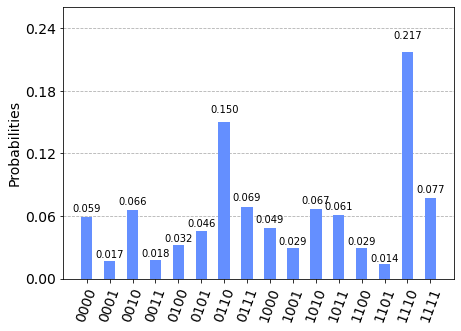

In [155]:
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
result = execute(qc, backend, shots=1000).result()
counts  = result.get_counts(qc)
plot_histogram(counts)

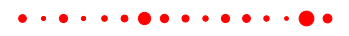

In [213]:
#sort the coefficients [0000,0001,0010,....1111]
sortCoeff=list(dict(sorted(counts.items())).values())

# Create Figure and plots
fig = plt.figure();
ax = fig.add_subplot(111);
for i in range(16):
    ax.scatter(i, 1, s=sortCoeff[i], c='r')
ax.set_aspect(10);
ax.axis("off");
